In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [47]:
df = pd.read_csv('carprices.csv')

In [48]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


#### in this data set we have to predict value of car model price from age and mileade of car 

In [50]:
df.columns = ['car_model','mileage','sell_price','age']

In [51]:
df

,car_model,mileage,sell_price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


#### for simplicity we just rename our columns

In [52]:
df.columns

Index(['car_model', 'mileage', 'sell_price', 'age'], dtype='object')

In [53]:
df.car_model.unique(), df.car_model.nunique()

(array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object), 3)

#### out data set has 3 car types these are 'BMW X5', 'Audi A5', 'Mercedez Benz C class' 

#### we have to conver this 3 type of object data inot numerical value data so our machine learning model can process on it

## pandas get dummies methos

In [54]:
df1 = pd.get_dummies(df['car_model'])

#### now we merge this dummies in our data set

In [55]:
df = pd.concat([df,df1],axis=1)

In [56]:
df

,car_model,mileage,sell_price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


#### now we dont need car_model column and for avoiding dummy variable trap we drop Mercedez Benz C class column

In [57]:
df = df.drop(['car_model','Mercedez Benz C class'],axis=1)

In [58]:
df

,mileage,sell_price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


#### now we have all numeric values

#### before selecting our machine learning model we will check our input and ouput data's relation

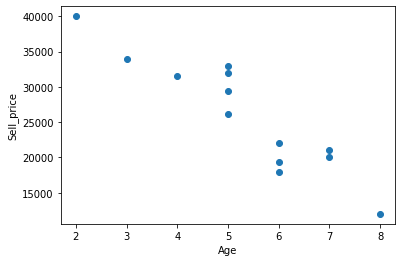

In [59]:
plt.xlabel('Age')
plt.ylabel('Sell_price')
plt.scatter(df.age,df.sell_price)

#### so here we have linear relationship between age and price, as age increase price reduces

#### now we check relation between mileage and price

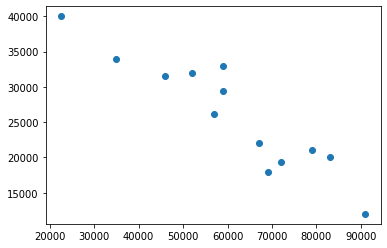

In [60]:
plt.scatter(df.mileage,df.sell_price)

#### here also we have linear raltionship, as mileage rises price reduces

### so from both visualisation we can choose linear Regression as our machine learning model

In [61]:
df

,mileage,sell_price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [62]:
model = LinearRegression()

In [63]:
X = df.drop(['sell_price'],axis=1)
X

,mileage,age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [64]:
y = df.sell_price

In [65]:
model.fit(X,y)

LinearRegression()

In [66]:
model.score(X,y)*100

94.17050937281081

### our model is 94% accurate

### let we predict some car model price

### mercedez benz, 4yr old, mileage 45000

In [67]:
model.predict([[45000,4,0,0]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

### BMW X5, 7yr old, mileage 86000

In [68]:
model.predict([[86000,7,0,1]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

## With same assumption we will try with OneHotEncoding

In [69]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [70]:
model1 = LabelEncoder()

In [71]:
df.head()

,mileage,sell_price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


In [72]:
df1 = pd.read_csv('carprices.csv')

In [73]:
df1

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [74]:
model2 = OneHotEncoder()

In [91]:
df2 = pd.DataFrame(model2.fit_transform(df1[['Car Model']]).toarray(),columns=['BMW X5', 'Audi A5', 'Mercedez Benz C class'])

In [92]:
merge = pd.concat([df1,df2],axis=1)

In [93]:
merge

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Audi A5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0.0,1.0,0.0
1,BMW X5,35000,34000,3,0.0,1.0,0.0
2,BMW X5,57000,26100,5,0.0,1.0,0.0
3,BMW X5,22500,40000,2,0.0,1.0,0.0
4,BMW X5,46000,31500,4,0.0,1.0,0.0
5,Audi A5,59000,29400,5,1.0,0.0,0.0
6,Audi A5,52000,32000,5,1.0,0.0,0.0
7,Audi A5,72000,19300,6,1.0,0.0,0.0
8,Audi A5,91000,12000,8,1.0,0.0,0.0
9,Mercedez Benz C class,67000,22000,6,0.0,0.0,1.0


In [95]:
final = merge.drop(['Car Model','Mercedez Benz C class'],axis=1)

In [96]:
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Audi A5
0,69000,18000,6,0.0,1.0
1,35000,34000,3,0.0,1.0
2,57000,26100,5,0.0,1.0
3,22500,40000,2,0.0,1.0
4,46000,31500,4,0.0,1.0
5,59000,29400,5,1.0,0.0
6,52000,32000,5,1.0,0.0
7,72000,19300,6,1.0,0.0
8,91000,12000,8,1.0,0.0
9,67000,22000,6,0.0,0.0


In [98]:
X1 = final.drop(['Sell Price($)'],axis=1)

In [99]:
y1 = final['Sell Price($)']

In [104]:
model3 = LinearRegression()

In [105]:
model3.fit(X1,y1)

LinearRegression()

In [106]:
model3.score(X1,y1)*100

94.17050937281081

### BMW X5, 7yr old, mileage 86000

In [108]:
model3.predict([[86000,7,0,1]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

## So here we have same result with dummy making methods